Task 2: Data Acquisition and Inspection

In [41]:
import pandas as pd

df = pd.read_csv('vehiclefueleconomies.csv', low_memory=False)
df_info = df.info()
df_head = df.head()

df_shape = df.shape
missing_values = df.isnull().sum()

categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique()[:5] for col in categorical_columns}

df_info, df_head, df_shape, missing_values, unique_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40704 entries, 0 to 40703
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40704 non-null  float64
 1   barrelsA08       40704 non-null  float64
 2   charge120        40704 non-null  int64  
 3   charge240        40704 non-null  float64
 4   city08           40704 non-null  int64  
 5   city08U          40704 non-null  float64
 6   cityA08          40704 non-null  int64  
 7   cityA08U         40704 non-null  float64
 8   cityCD           40704 non-null  float64
 9   cityE            40704 non-null  float64
 10  cityUF           40704 non-null  float64
 11  co2              40704 non-null  int64  
 12  co2A             40704 non-null  int64  
 13  co2TailpipeAGpm  40704 non-null  float64
 14  co2TailpipeGpm   40704 non-null  float64
 15  comb08           40704 non-null  int64  
 16  comb08U          40704 non-null  float64
 17  combA08     

(None,
    barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
 0  15.695714         0.0          0        0.0      18      0.0        0   
 1  14.982273         0.0          0        0.0      20      0.0        0   
 2  21.974000         0.0          0        0.0      13      0.0        0   
 3  21.974000         0.0          0        0.0      13      0.0        0   
 4  19.388824         0.0          0        0.0      15      0.0        0   
 
    cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
 0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
 1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
 2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
 3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
 4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
 
                       createdOn                    modifie

Task 3: Data Cleaning and Preparation

In [43]:
df_cleaned = df.drop_duplicates()

categorical_fill_values = {
    "drive": "Unknown",
    "eng_dscr": "Unknown",
    "fuelType2": "Unknown",
    "trany": "Unknown",
    "VClass": "Unknown",
    "guzzler": "Unknown",
    "trans_dscr": "Unknown",
    "tCharger": "Unknown",
    "sCharger": "Unknown",
    "atvType": "Unknown",
    "evMotor": "Unknown",
    "mfrCode": "Unknown",
    "c240Dscr": "Unknown",
    "c240bDscr": "Unknown",
    "startStop": "Unknown",
}

df_cleaned.fillna(categorical_fill_values, inplace=True)

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(lambda x: x.fillna(x.mean()))

df_cleaned['year'] = pd.to_datetime(df_cleaned['year'], format='%Y')
categorical_columns = ["fuelType", "trany", "VClass", "make", "model"]
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

cleaned_shape = df_encoded.shape
missing_values_after_cleaning = df_encoded.isnull().sum().sum()

cleaned_shape, missing_values_after_cleaning


((40704, 4315), 39126)

Task 4: Exploratory Data Analysis (EDA) Using Seaborn

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

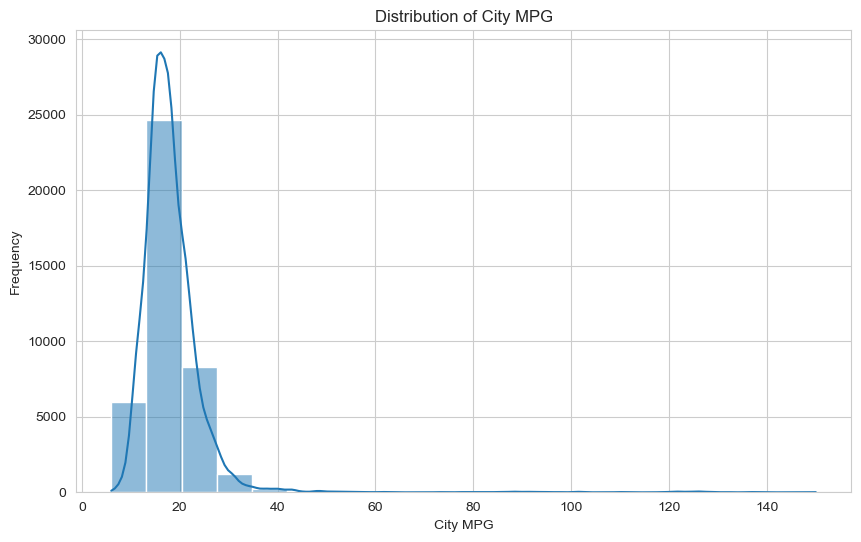

Plot saved successfully at: plots/city_mpg_distribution.png


In [47]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


save_path = "plots" 
os.makedirs(save_path, exist_ok=True) 

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['city08'], bins=20, kde=True)
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.title('Distribution of City MPG')

file_path = os.path.join(save_path, "city_mpg_distribution.png")
plt.savefig(file_path)

plt.show()

print(f"Plot saved successfully at: {file_path}")

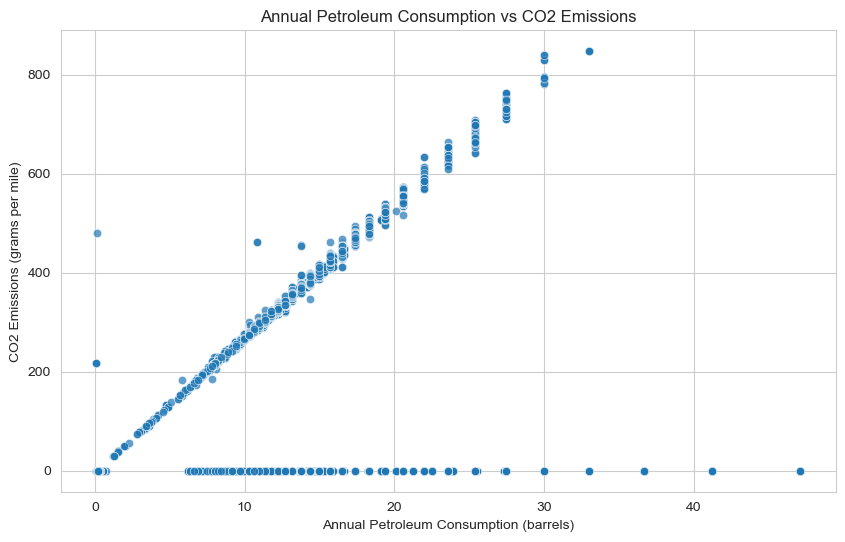

Plot saved successfully at: plots/co2_vs_petroleum.png


In [49]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

save_dir = "plots"
os.makedirs(save_dir, exist_ok=True)  

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='barrels08', y='co2', alpha=0.7)
plt.xlabel('Annual Petroleum Consumption (barrels)')
plt.ylabel('CO2 Emissions (grams per mile)')
plt.title('Annual Petroleum Consumption vs CO2 Emissions')

file_path = os.path.join(save_dir, "co2_vs_petroleum.png")
plt.savefig(file_path)

plt.show()

print(f"Plot saved successfully at: {file_path}")


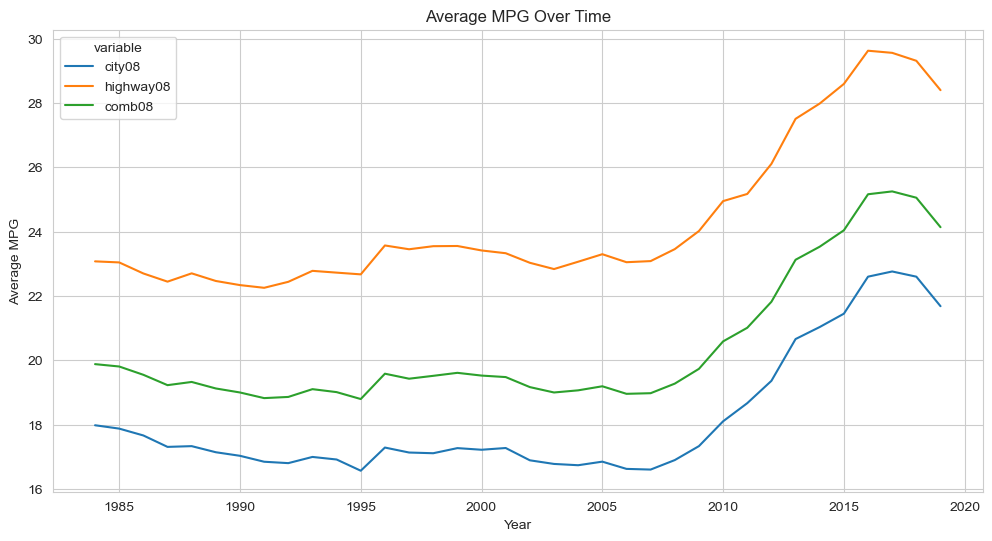

Plot saved successfully at: plots/average_mpg_over_time.png


In [51]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

save_dir = "plots"
os.makedirs(save_dir, exist_ok=True) 

mpg_data = df_cleaned.groupby(df_cleaned['year'].dt.year)[['city08', 'highway08', 'comb08']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='variable', data=mpg_data.melt(id_vars=['year']))
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('Average MPG Over Time')

file_path = os.path.join(save_dir, "average_mpg_over_time.png")
plt.savefig(file_path)

plt.show()

print(f"Plot saved successfully at: {file_path}")


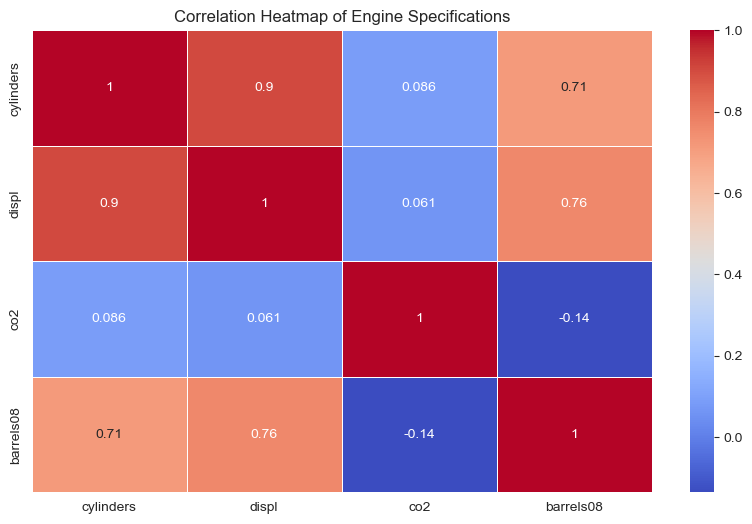

Plot saved successfully at: plots/correlation_heatmap.png


In [53]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

save_dir = "plots"
os.makedirs(save_dir, exist_ok=True) 

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['cylinders', 'displ', 'co2', 'barrels08']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Engine Specifications')

file_path = os.path.join(save_dir, "correlation_heatmap.png")
plt.savefig(file_path)

plt.show()

print(f"Plot saved successfully at: {file_path}")

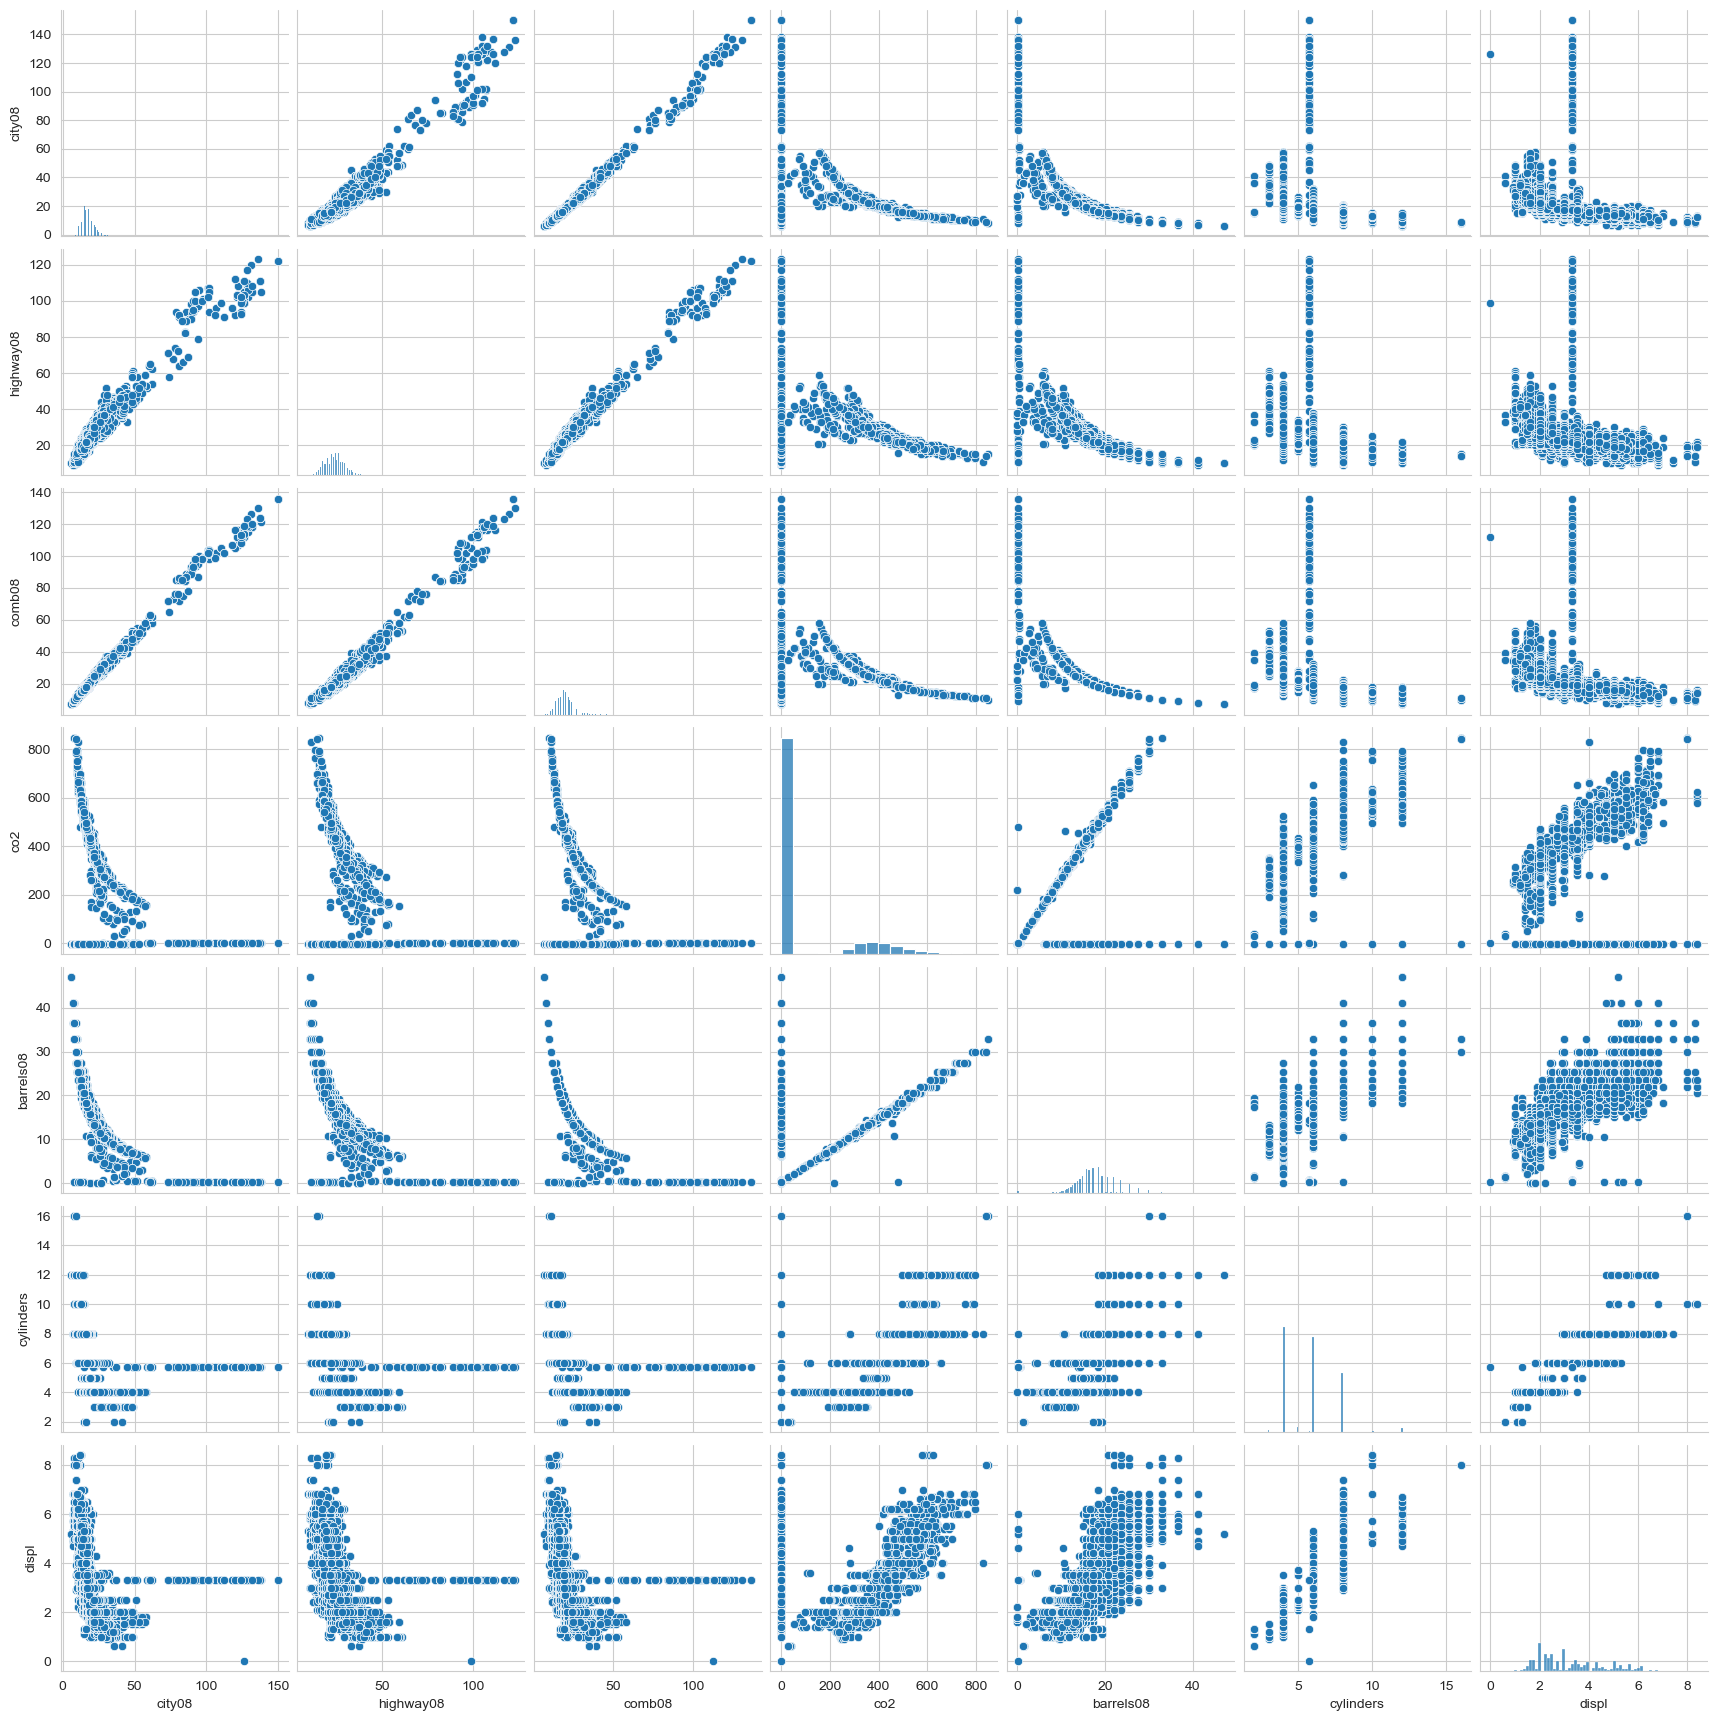

Plot saved successfully at: plots/pairplot_fuel_emissions.png


In [55]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

save_dir = "plots"
os.makedirs(save_dir, exist_ok=True) 

selected_columns = ['city08', 'highway08', 'comb08', 'co2', 'barrels08', 'cylinders', 'displ']

sns.pairplot(df_cleaned[selected_columns])
file_path = os.path.join(save_dir, "pairplot_fuel_emissions.png")
plt.savefig(file_path)

plt.show()

print(f"Plot saved successfully at: {file_path}")


Task 6: Advanced Analysis - Market Share Trends for EV Manufacturers

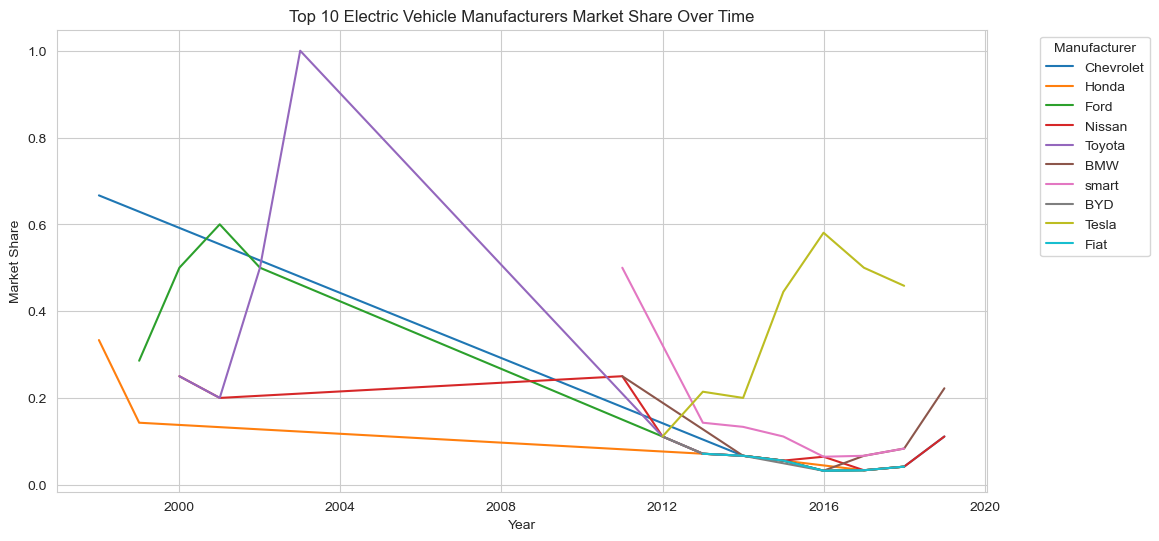

Plot saved successfully at: plots/ev_market_share.png


In [57]:

import os
import matplotlib.pyplot as plt
import seaborn as sns


save_dir = "plots"
os.makedirs(save_dir, exist_ok=True)  

ev_data = df_cleaned[df_cleaned['fuelType'] == 'Electricity']

manufacturer_trends = ev_data.groupby(['year', 'make']).size().reset_index(name='EV_Count')

manufacturer_trends['Market_Share'] = manufacturer_trends['EV_Count'] / manufacturer_trends.groupby('year')['EV_Count'].transform('sum')

top_10_manufacturers = manufacturer_trends.groupby('make')['EV_Count'].sum().nlargest(10).index
filtered_trends = manufacturer_trends[manufacturer_trends['make'].isin(top_10_manufacturers)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_trends, x='year', y='Market_Share', hue='make')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Top 10 Electric Vehicle Manufacturers Market Share Over Time')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

ev_market_share_path = os.path.join(save_dir, "ev_market_share.png")
plt.savefig(ev_market_share_path)

plt.show()

print(f"Plot saved successfully at: {ev_market_share_path}")